In [1]:
#Import Libraries
from generate_data_class import GenerateData
import genetic_algo_gs as gag
import kmeans
import numpy

In [2]:
#Inputs
k = 3

initial_centroids = gag.init_cluster_center(k)
fit_func = gag.fitness_func(initial_centroids)

In [3]:
#Generate Data
gy = GenerateData(k)
rawData = gy.raw_data()

In [4]:
_, plot_result, _, _ = gag.GeneticAlgorithm(gag.fitness_func,k,100)

Generation #-1   |fitness: 0.00126 |Centroid = [44.  50.6 12.1 12.1  2.2  2.2]
Generation #0   |fitness: 0.00140 |Centroid = [1.  0.8 1.8 1.8 1.6 1.6]
Generation #1   |fitness: 0.00140 |Centroid = [1.  0.8 1.8 1.8 1.6 0.6]
Generation #2   |fitness: 0.00140 |Centroid = [0.  1.8 1.8 1.8 0.6 0.4]
Generation #3   |fitness: 0.00140 |Centroid = [0.  1.8 1.8 1.8 1.6 0.6]
Generation #4   |fitness: 0.00128 |Centroid = [0.  1.4 1.7 1.1 1.6 0.6]
Generation #5   |fitness: 0.00139 |Centroid = [0.  1.4 1.7 1.8 1.6 0.6]
Generation #6   |fitness: 0.00138 |Centroid = [0.  0.4 1.7 1.7 0.6 0.4]
Generation #7   |fitness: 0.00138 |Centroid = [1.  0.4 1.7 1.7 0.6 0.4]
Generation #8   |fitness: 0.00138 |Centroid = [0.  1.4 1.7 1.7 0.6 1.4]
Generation #9   |fitness: 0.00139 |Centroid = [0.  1.4 1.7 1.8 0.6 0.4]
Generation #10   |fitness: 0.00139 |Centroid = [0.  1.4 1.7 1.8 0.6 1.4]
Generation #11   |fitness: 0.00139 |Centroid = [0.  0.4 1.7 1.8 0.6 1.4]
Generation #12   |fitness: 0.00139 |Centroid = [0.  0.4

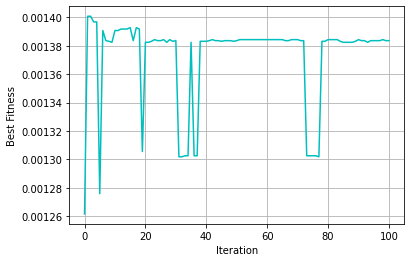

In [5]:
gag.display_plot(plot_result)

In [10]:
def kmean_data(data):
    l = []
    for el in data:
        l2 = []
        l2.append(el[0][0])
        l2.append(el[1][0])
        l.append(numpy.array(l2))

    return numpy.array(l)

model = kmeans.KMeans(k)
data1 = kmean_data(gy.raw_data())
model.fit(data1)
lk, ml = model.to__solution()
print(f'Fitness value of K-Means output is: {gag.fitness_func(numpy.array([lk]))[0]:0.5f}')

Fitness value of K-Means output is: 0.00022


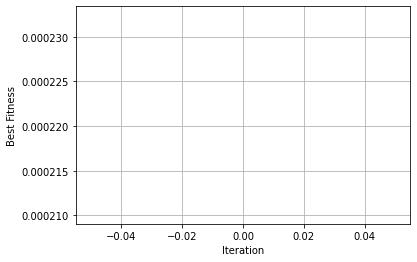

In [31]:
ko = []
ko.append(ml)
ko.append(ml)
lp = []
kmean_fitness_list = []
for i in range(len(ko)):
    yi = []
    for j in range(k):
        for u in range(2):
            yi.append(ko[i][j][u])
    lp.append(yi)
kmean_fitness_list.append(gag.fitness_func(numpy.array(lp)))    

#plot kmeans fitness evolution
gag.display_plot(kmean_fitness_list)
